In [1426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [1427]:
# fardina has a priming question before the AITA questions

df1 = pd.read_csv('data/max_spring2025.csv')
df2 = pd.read_csv('data/max_all.csv')
df3 = pd.read_csv('data/fardina_all.csv')
df4 = pd.read_csv('data/2024.csv')
#exact phrasings for df1 questions
questions = [
    'Timestamp', 
    'What year are you?', 
    'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
      "My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?",
       "My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-mother practically raised him from a baby and I think that she deserves it far more than me. He was really upset and hurt when I said no. Am I a jerk?'",
       "I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my boyfriend, who comes from a poor family, and we split things 50-50. Recently, he found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making him split things 50/50. I told him it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?",
       "My husband and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My husband's son currently goes to a much less nice public school. My husband says I'm a jerk for not paying for his son to go to private school as well.",
       "I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?",
       "My brother's nine year old son is poorly behaved. One day, my brother dropped the son off on my doorstep without my consent and drove off, texting me that he needed me to watch his son for the day. The son complained of being hungry, so I gave him the leftovers I had. He said he didn't like them, but I told him that's all there was. He put them in the microwave until they burned, then told me he couldn't eat them and we would have to go out and get food. I told him that was what there was to eat, and if he ruined it he'd have to wait for his dad to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?",
       "My parents want us to come out for their anniversary, and bought my brother and I tickets on the same flight. My brother has two kids - a 6 month old and a 5 year old. He is currently separated from his wife so he would have to handle 2 children by herself on a 10 hour flight.\n\nHe calls me up a week or so beforehand and asks me if I will be willing to help him take care of his kids on the flight, and something about taking shifts so we can both sleep. I tell him that I wasn't comfortable with that, but he says 'nephew loves you so much' so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my brother. Am I a jerk?",
       "I'm a single dad with four kids, one of whom has a different mother from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?",
       "I have a child with a father who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's father to make sure he's paying adequate child support. Periodically I either hire an investigator or her dad just tells me he got a raise and I go to court to adjust the child support accordingly. The last time I did this, he didn't show up for court and I apparently overestimated how much his raise was and I got a default judgment. He called me up and practically pleaded with me to lower his payments after I said no he insulted me and my son. Am I a jerk?",
       "One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for him schooling unless he picked a career path that will make at least 100,000 a year. Am I a jerk?",
       "I was in a conflict with my father-in-law's girlfriend, in which I made a snide comment about she's never paid child support to his ex. Later, she called me and told me if I ever said anything like that ever again she'd sue me for defamation. I took the threat seriously, as she is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?",
       "Some of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?",
       "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?",
       "My brother is going to be a groomsman at my wedding. His hair was dyed, but he recently decided to grow it out, so parts of it are bleached and part are not. I told him it wouldn't look good in the pictures, and offered to pay for him to dye it. He said no, and I said he couldn't be in the wedding party. Am I a jerk?",
      ]

questions_succint = [
    "time",
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

questions_succint_primer = [
    "time",
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
    "compassion primer",
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

aita_questions = [
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

personal = [
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
]

df1.columns = questions_succint
df2.columns = questions_succint
df3.columns = questions_succint_primer
df4.columns = questions_succint


In [1428]:
df4["gender"].value_counts()

gender
Male                  102
Female                 28
Non-binary / other      1
Prefer not to say       1
Name: count, dtype: int64

In [1547]:
for i in personal:
    print(df_clean[i].value_counts())
    print()

year
Junior       208
Sophomore    110
Senior        42
Name: count, dtype: int64

age
20.0    198
19.0    109
21.0     53
Name: count, dtype: int64

upbringing
Mildly conservative              109
Mildly liberal                   104
Neutral                           70
Don't know / It's complicated     29
Strongly conservative             28
Strongly liberal                  20
Name: count, dtype: int64

self
Mildly liberal                   146
Neutral                           81
Strongly liberal                  64
Mildly conservative               49
Don't know / It's complicated     20
Name: count, dtype: int64

religion
Not religious at all    161
Somewhat religious      156
Strongly religious       43
Name: count, dtype: int64

gender
Male      276
Female     84
Name: count, dtype: int64



In [1429]:
df3_2 = df3.drop(columns=["compassion primer"])

In [1430]:
df_all_raw = pd.concat([df1, df2, df3_2, df4], axis=0)

In [1431]:
len(df_all_raw)

473

In [1544]:
for i in personal:
    print(df_all_raw[i].value_counts())
    print()

year
Junior              231
Sophmore            124
Senior               72
Graduate Student     25
Other                 6
Freshman              5
Name: count, dtype: int64

age
20      156
19       84
20.0     54
21       45
19.0     32
21.0     14
22       10
22.0      9
18        8
23        8
23.0      6
18.0      5
17        4
25.0      4
25        3
50+       3
28.0      3
24.0      2
26        2
24        2
27        1
28        1
40        1
29        1
45.0      1
33.0      1
26.0      1
Name: count, dtype: int64

upbringing
Mildly conservative              140
Mildly liberal                   125
Neutral                           88
Strongly conservative             42
Don't know / It's complicated     37
Strongly liberal                  30
Name: count, dtype: int64

self
Mildly liberal                   176
Neutral                          104
Strongly liberal                  83
Mildly conservative               57
Don't know / It's complicated     27
Strongly conservati

In [1433]:
df_clean = df_all_raw.copy()

In [1434]:
df_clean["na_count"] = df_clean.isna().sum(axis=1)
df_clean["na_count"].value_counts()

na_count
0     423
1      22
20      9
2       6
4       3
6       2
10      2
14      2
9       1
5       1
18      1
8       1
Name: count, dtype: int64

In [1435]:
df_clean = df_clean[df_clean["na_count"] < 4]

In [1436]:

for i in personal:
    print(df_clean[i].value_counts())
    print("\n")

year
Junior              227
Sophmore            121
Senior               69
Graduate Student     24
Freshman              5
Other                 5
Name: count, dtype: int64


age
20      154
19       81
20.0     53
21       44
19.0     32
21.0     14
22        9
22.0      8
18        8
23        6
23.0      6
18.0      5
17        4
25.0      4
25        3
28.0      3
24.0      2
26        2
50+       2
24        2
27        1
28        1
40        1
29        1
45.0      1
33.0      1
26.0      1
Name: count, dtype: int64


upbringing
Mildly conservative              137
Mildly liberal                   122
Neutral                           85
Strongly conservative             41
Don't know / It's complicated     36
Strongly liberal                  30
Name: count, dtype: int64


self
Mildly liberal                   172
Neutral                          102
Strongly liberal                  81
Mildly conservative               55
Don't know / It's complicated     27
Strongly conserv

In [1437]:
df_clean["gender"] = df_clean["gender"].apply(lambda x: x if x != "Famale" else "Female")

df_clean["age"] = df_clean["age"].apply(lambda x: x if x != "50+" else "50")

df_clean["year"] = df_clean["year"].apply(lambda x: x if x != "Sophmore" else "Sophomore")

In [1438]:
df_clean["age"] = df_clean["age"].apply(lambda x: str(float(x)))

In [1439]:
df_clean["religion"] = df_clean["religion"].apply(lambda x: x if x != "Not spiritual at all" else "Not religious at all")
df_clean["religion"] = df_clean["religion"].apply(lambda x: x if x != "Somewhat spiritual" else "Somewhat religious")
df_clean["religion"] = df_clean["religion"].apply(lambda x: x if x != "Strongly spiritual" else "Strongly religious")

In [1440]:
for i in questions_succint:
    df_clean[i].fillna(df_clean[i].mode()[0], inplace=True)

C:\Users\jonat\AppData\Local\Temp\ipykernel_13500\5301226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[i].fillna(df_clean[i].mode()[0], inplace=True)


In [1441]:
for i in personal:
    df_clean = df_clean[df_clean[i].map(df_clean[i].value_counts()) > len(df_clean)/30.0]
for i in personal:
    df_clean = df_clean[df_clean[i].map(df_clean[i].value_counts()) > len(df_clean)/30.0]

In [1442]:
for i in personal:
    print(df_clean[i].value_counts())
    print("\n")

year
Junior       208
Sophomore    110
Senior        42
Name: count, dtype: int64


age
20.0    198
19.0    109
21.0     53
Name: count, dtype: int64


upbringing
Mildly conservative              109
Mildly liberal                   104
Neutral                           70
Don't know / It's complicated     29
Strongly conservative             28
Strongly liberal                  20
Name: count, dtype: int64


self
Mildly liberal                   146
Neutral                           81
Strongly liberal                  64
Mildly conservative               49
Don't know / It's complicated     20
Name: count, dtype: int64


religion
Not religious at all    161
Somewhat religious      156
Strongly religious       43
Name: count, dtype: int64


gender
Male      276
Female     84
Name: count, dtype: int64




In [1443]:
df_clean["na_count"] = df_clean.isna().sum(axis=1)
df_clean["na_count"].value_counts()

na_count
0    360
Name: count, dtype: int64

In [1444]:
def clean_data(to_clean):
    df = to_clean.copy()
    
    df["na_count"] = df.isna().sum(axis=1)
    df = df[df["na_count"] < 4]

    df["gender"] = df["gender"].apply(lambda x: x if x != "Famale" else "Female")

    df["age"] = df["age"].apply(lambda x: x if x != "50+" else "50")

    df["year"] = df["year"].apply(lambda x: x if x != "Sophmore" else "Sophomore")

    df["age"] = df["age"].apply(lambda x: str(float(x)))
    
    df["religion"] = df["religion"].apply(lambda x: x if x != "Not spiritual at all" else "Not religious at all")
    df["religion"] = df["religion"].apply(lambda x: x if x != "Somewhat spiritual" else "Somewhat religious")
    df["religion"] = df["religion"].apply(lambda x: x if x != "Strongly spiritual" else "Strongly religious")

    for i in questions_succint:
        df[i].fillna(df[i].mode()[0], inplace=True)

    for i in personal:
        df = df[df[i].map(df[i].value_counts()) > len(df)/30.0]
    for i in personal:
        df = df[df[i].map(df[i].value_counts()) > len(df)/30.0]

    return df
    

In [1445]:
for i in personal:
    print(df_all_raw[i].value_counts())
    print("\n")

year
Junior              231
Sophmore            124
Senior               72
Graduate Student     25
Other                 6
Freshman              5
Name: count, dtype: int64


age
20      156
19       84
20.0     54
21       45
19.0     32
21.0     14
22       10
22.0      9
18        8
23        8
23.0      6
18.0      5
17        4
25.0      4
25        3
50+       3
28.0      3
24.0      2
26        2
24        2
27        1
28        1
40        1
29        1
45.0      1
33.0      1
26.0      1
Name: count, dtype: int64


upbringing
Mildly conservative              140
Mildly liberal                   125
Neutral                           88
Strongly conservative             42
Don't know / It's complicated     37
Strongly liberal                  30
Name: count, dtype: int64


self
Mildly liberal                   176
Neutral                          104
Strongly liberal                  83
Mildly conservative               57
Don't know / It's complicated     27
Strongly conserv

In [1446]:
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

In [1447]:
alpha = 0.05
sig_vals = []

In [1448]:
for demo in personal:
    print(f"\n{demo}\n")
    p_vals = []

    for i in aita_questions:
        data = pd.crosstab(df_clean[i], df_clean[demo])
        stat, p, dof, expected = chi2_contingency(data)
        p_vals.append(p)

    significant_tests = [i < alpha for i in p_vals]

    # Print results
    for i, (p, sig) in enumerate(zip(p_vals, significant_tests)):
        print(f"\tTest {i+1}, {aita_questions[i]}: \n\t\tOriginal p={p:.5f}, Significant={sig}")
        if sig:
            sig_vals.append((demo, aita_questions[i]))



year

	Test 1, doctor: 
		Original p=0.86870, Significant=False
	Test 2, reading: 
		Original p=0.26754, Significant=False
	Test 3, trust fund: 
		Original p=0.34677, Significant=False
	Test 4, private school: 
		Original p=0.38006, Significant=False
	Test 5, cat: 
		Original p=0.78550, Significant=False
	Test 6, burned food: 
		Original p=0.82785, Significant=False
	Test 7, flight: 
		Original p=0.53977, Significant=False
	Test 8, child support: 
		Original p=0.43003, Significant=False
	Test 9, investigation: 
		Original p=0.48227, Significant=False
	Test 10, expensive school: 
		Original p=0.30167, Significant=False
	Test 11, in law: 
		Original p=0.09241, Significant=False
	Test 12, lgbtq: 
		Original p=0.52636, Significant=False
	Test 13, drinking: 
		Original p=0.90002, Significant=False
	Test 14, hair dye: 
		Original p=0.32401, Significant=False

age

	Test 1, doctor: 
		Original p=0.93020, Significant=False
	Test 2, reading: 
		Original p=0.60415, Significant=False
	Test 3, tr

In [1475]:
for demo in ["self"]:
    leans = ["Strongly liberal", "Mildly liberal", "Neutral", "Mildly conservative"]
    for i in leans:
        for j in leans:
            if i != j:
                print(i + " " + j)
                p_val_lean = []
                leans2 = [i, j]
                data_ind = df_clean[df_clean["self"].isin(leans2)]
                
                for k in aita_questions:
                    data = pd.crosstab(data_ind[k], data_ind[demo])
                    stat, p, dof, expected = chi2_contingency(data)
                    p_val_lean.append(p)
                    
                significant_tests = [n < alpha for n in p_val_lean]

                for m, (p, sig) in enumerate(zip(p_val_lean, significant_tests)):
                    print(f"\tTest {m+1}, {aita_questions[m]}: \n\t\tOriginal p={p:.5f}, Significant={sig}")

Strongly liberal Mildly liberal
	Test 1, doctor: 
		Original p=0.11489, Significant=False
	Test 2, reading: 
		Original p=0.09119, Significant=False
	Test 3, trust fund: 
		Original p=0.12609, Significant=False
	Test 4, private school: 
		Original p=0.12101, Significant=False
	Test 5, cat: 
		Original p=0.15131, Significant=False
	Test 6, burned food: 
		Original p=0.54009, Significant=False
	Test 7, flight: 
		Original p=0.00511, Significant=True
	Test 8, child support: 
		Original p=0.00831, Significant=True
	Test 9, investigation: 
		Original p=0.54751, Significant=False
	Test 10, expensive school: 
		Original p=0.09427, Significant=False
	Test 11, in law: 
		Original p=0.01267, Significant=True
	Test 12, lgbtq: 
		Original p=0.17882, Significant=False
	Test 13, drinking: 
		Original p=0.72709, Significant=False
	Test 14, hair dye: 
		Original p=0.75842, Significant=False
Strongly liberal Neutral
	Test 1, doctor: 
		Original p=0.43899, Significant=False
	Test 2, reading: 
		Original

In [1519]:
hm = []
for demo in ["self"]:
    leans = ["Strongly liberal", "Mildly liberal", "Neutral", "Mildly conservative"]
    for i in leans:
        row = []
        for j in leans:
            if i != j:
                p_val_lean = []
                leans2 = [i, j]
                data_ind = df_clean[df_clean["self"].isin(leans2)]
                
                for k in ["flight"]:
                    data = pd.crosstab(data_ind[k], data_ind[demo])
                    stat, p, dof, expected = chi2_contingency(data)
                    p_val_lean.append(p)
                row.append(p)
                significant_tests = [n < alpha for n in p_val_lean]

            else:
                row.append(1)
        hm.append(row)

print(hm)

[[1, np.float64(0.0051087761644928766), np.float64(0.03544122445408068), np.float64(0.08687272076818615)], [np.float64(0.0051087761644928766), 1, np.float64(0.9002227283879181), np.float64(0.867997628340833)], [np.float64(0.03544122445408068), np.float64(0.9002227283879181), 1, np.float64(0.9874339291218025)], [np.float64(0.08687272076818615), np.float64(0.867997628340833), np.float64(0.9874339291218025), 1]]


<Figure size 800x600 with 0 Axes>

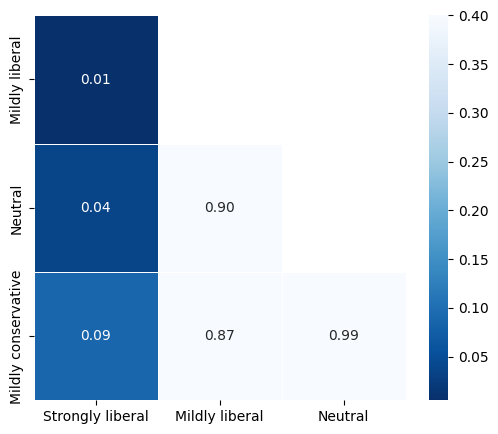

In [ ]:

leans = ["Strongly liberal", "Mildly liberal", "Neutral", "Mildly conservative"]
hm_data = {leans[i]: hm[i] for i in range(4)}
df_hm = pd.DataFrame(data=hm_data, index=leans)
df_corner = df_hm.iloc[1:, :-1]  # Exclude first row and last column

plt.figure(figsize=(8, 6))

mask = np.triu(np.ones_like(df_corner, dtype=bool), k=1)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df_corner, mask=mask, annot=True, cmap="Blues_r", vmax= 0.4, fmt=".2f", linewidths=0.5)


# Show plot
plt.show()

In [1500]:
hm = []
for demo in ["religion"]:
    leans = ["Strongly religious","Somewhat religious", "Not religious at all"]
    for i in leans:
        row = []
        for j in leans:
            if i != j:
                p_val_lean = []
                leans2 = [i, j]
                data_ind = df_clean[df_clean["religion"].isin(leans2)]
                
                for k in ["lgbtq"]:
                    data = pd.crosstab(data_ind[k], data_ind[demo])
                    stat, p, dof, expected = chi2_contingency(data)
                    p_val_lean.append(p)
                row.append(p)
                significant_tests = [n < alpha for n in p_val_lean]

            else:
                row.append(1)
        hm.append(row)

print(hm)

[[1, np.float64(0.09972342972192695), np.float64(0.06035908170600186)], [np.float64(0.09972342972192695), 1, np.float64(0.039042326358521055)], [np.float64(0.06035908170600186), np.float64(0.039042326358521055), 1]]


<Figure size 800x600 with 0 Axes>

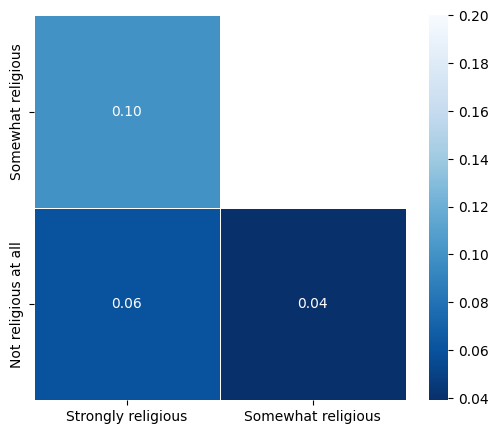

In [1505]:

leans = ["Strongly religious","Somewhat religious", "Not religious at all"]
hm_data = {leans[i]: hm[i] for i in range(3)}
df_hm = pd.DataFrame(data=hm_data, index=leans)
df_corner = df_hm.iloc[1:, :-1]  # Exclude first row and last column

plt.figure(figsize=(8, 6))

mask = np.triu(np.ones_like(df_corner, dtype=bool), k=1)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df_corner, mask=mask, annot=True, cmap="Blues_r", vmax= 0.2, fmt=".2f", linewidths=0.5)


# Show plot
plt.show()

In [1543]:
df_rel = df_clean[df_clean["self"]!="Don't know / It's complicated"]
heatmap_data = pd.crosstab(df_rel['self'], df_rel['religion'])

stat, p, dof, expected = chi2_contingency(heatmap_data)
p

np.float64(0.055907814322757605)

religion             Not religious at all  Somewhat religious  \
self                                                            
Mildly conservative                  43.0                35.0   
Mildly liberal                       42.0                47.0   
Neutral                              40.0                47.0   
Strongly liberal                     58.0                36.0   

religion             Strongly religious  
self                                     
Mildly conservative                22.0  
Mildly liberal                     10.0  
Neutral                            14.0  
Strongly liberal                    6.0  


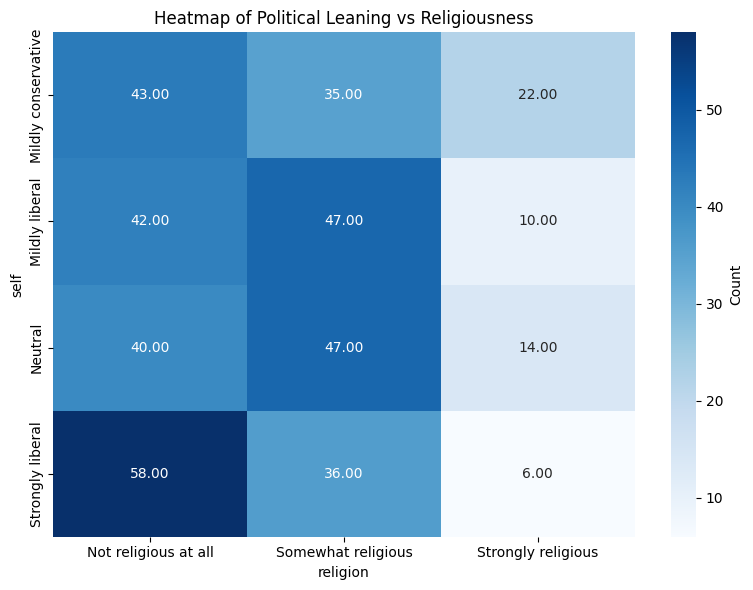

In [1539]:
df_rel = df_clean[df_clean["self"]!="Don't know / It's complicated"]
heatmap_data = pd.crosstab(df_rel['self'], df_rel['religion'])
normalized_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)
normalized_heatmap_data = normalized_heatmap_data.mul(100)
normalized_heatmap_data = normalized_heatmap_data.round()
print(normalized_heatmap_data)
plt.figure(figsize=(8, 6))

sns.heatmap(normalized_heatmap_data, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Count'})

plt.title('Heatmap of Political Leaning vs Religiousness')
plt.tight_layout()

plt.show()

In [1525]:

data = pd.crosstab(data_ind["religion"], data_ind["self"])
stat, p, dof, expected = chi2_contingency(data)


1.0

In [1450]:
def graph_proportion_stack(df, aita, demo, col_order, stack_order, color, label=None):
    if label is None:
        label = demo
    df_political = df[df[demo].isin(stack_order)]
    group_counts = df_political.groupby([aita, demo]).size().unstack(fill_value=0)
    min_group_size = group_counts.sum(axis=0).max()
    normalized_counts = (group_counts.div(group_counts.sum(axis=0), axis=1) * min_group_size).astype(int)
    normalized_proportions = normalized_counts.div(normalized_counts.sum(axis=1), axis=0)
    normalized_proportions = normalized_proportions[stack_order]
    normalized_proportions = normalized_proportions.reindex(col_order)
    ax = normalized_proportions.plot(
        kind='bar', stacked=True, color=[color[cat] for cat in stack_order], figsize=(8, 6)
    )

    plt.ylabel("Proportion")
    plt.xlabel("")
    print(f"{label} Distribution for {aita} Jerk Rating")
    plt.title("")
    plt.legend(labels=stack_order, loc='upper left', bbox_to_anchor=(1,1))
    plt.xticks(rotation=0)
    plt.show()


In [1451]:

def graph_proportion_side_by_side(df, aita, demo, order, int_order, color, label=None):
    df_political = df[df[demo].isin(order)]
    group_counts = df_political.groupby([aita, demo]).size().unstack(fill_value=0)
    min_group_size = group_counts.sum(axis=0).max()
    normalized_counts = (group_counts.div(group_counts.sum(axis=0), axis=1) * min_group_size).astype(int)
    normalized_proportions = normalized_counts.div(normalized_counts.sum(axis=0), axis=1) * 100
    df_melted = normalized_proportions.reset_index().melt(id_vars=[aita], 
                                                        value_vars=order,
                                                        var_name='Response', 
                                                        value_name='Proportion')

    plt.figure(figsize=(10, 6))

    sns.barplot(data=df_melted, x=aita, y='Proportion', hue='Response', palette=color, order=int_order, hue_order=order, saturation=1)

    print('Proportion of Responses by ' + aita)
    plt.title("")
    plt.ylabel('Proportion')
    plt.xlabel('')
    plt.xticks(rotation=0)

    plt.legend(loc='upper left', bbox_to_anchor=(1,1))

    plt.tight_layout()
    plt.show()

In [1452]:
pol_order = [
    "Strongly liberal",
    "Mildly liberal",
    "Neutral",
    "Mildly conservative",
    "Strongly conservative"
]

pol_colors = {
"Strongly liberal": "#0000cc",  # Deep Blue
"Mildly liberal": "#3366ff",    # Medium Blue
"Neutral": "#b9abc8",           # Gray
"Mildly conservative": "#ff5050",  # Medium Red
"Strongly conservative": "#cc0000",  # Deep Red
}
jerk_order = ["Not a jerk", "Mildly a jerk", "Strongly a jerk"]


Political Leaning in Upbringing Distribution for cat Jerk Rating


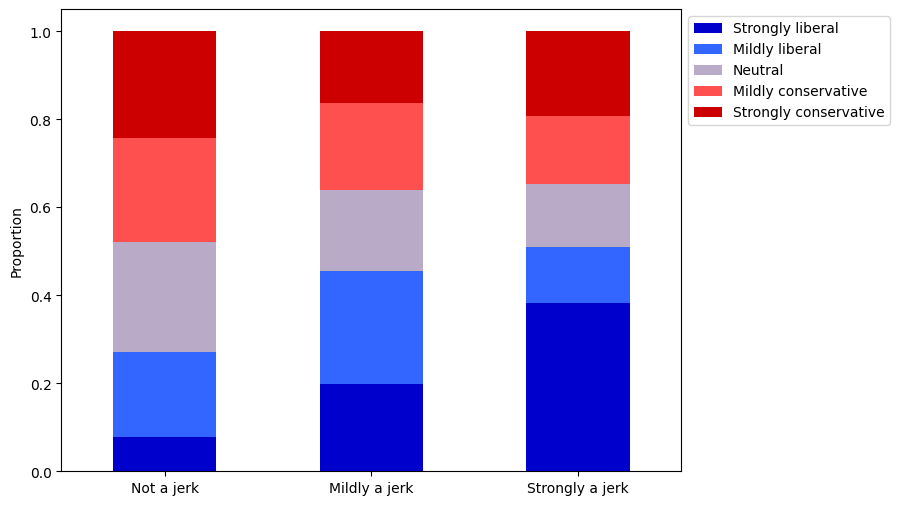

Proportion of Responses by cat


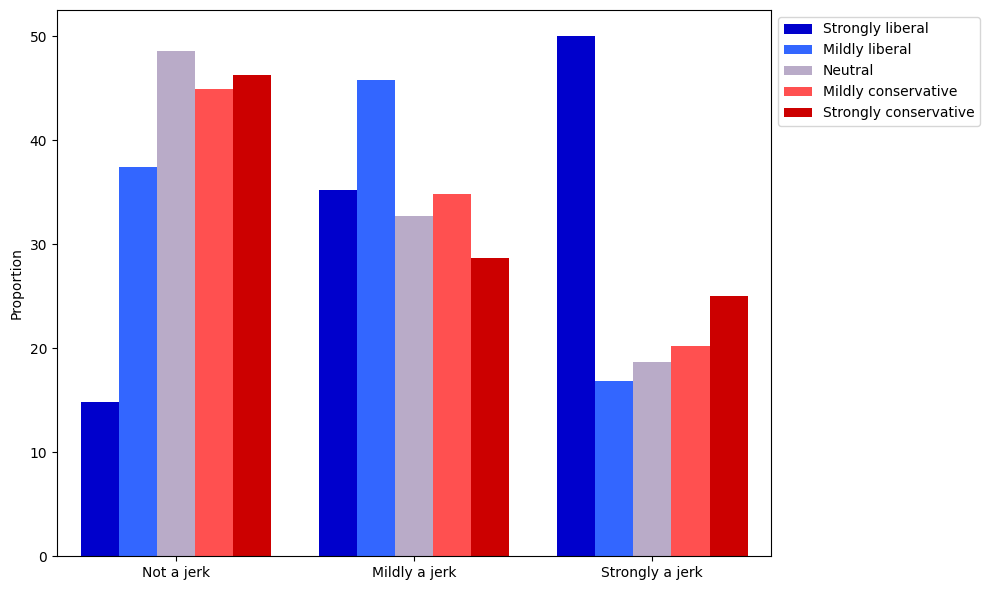

In [1453]:
demo = "upbringing"

for value in ["cat"]:
    graph_proportion_stack(df_clean, value, demo, jerk_order, pol_order, pol_colors, label="Political Leaning in Upbringing")
    graph_proportion_side_by_side(df_clean, value, demo, pol_order, jerk_order, pol_colors, label="Political Leaning in Upbringing")

In [1454]:
self_order = [
    "Strongly liberal",
    "Mildly liberal",
    "Neutral",
    "Mildly conservative",
]

self_colors = {
"Strongly liberal": "#0000cc",  # Deep Blue
"Mildly liberal": "#3366ff",    # Medium Blue
"Neutral": "#b9abc8",           # Gray
"Mildly conservative": "#ff5050",  # Medium Red
}

jerk_order = ["Not a jerk", "Mildly a jerk", "Strongly a jerk"]


In [1455]:
df_clean["self"].value_counts()

self
Mildly liberal                   146
Neutral                           81
Strongly liberal                  64
Mildly conservative               49
Don't know / It's complicated     20
Name: count, dtype: int64

Political Leaning in Upbringing Distribution for doctor Jerk Rating


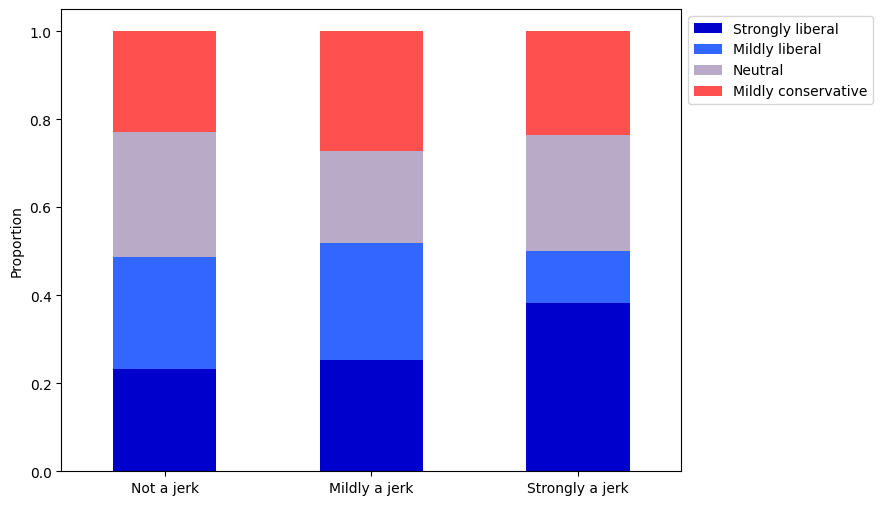

Proportion of Responses by doctor


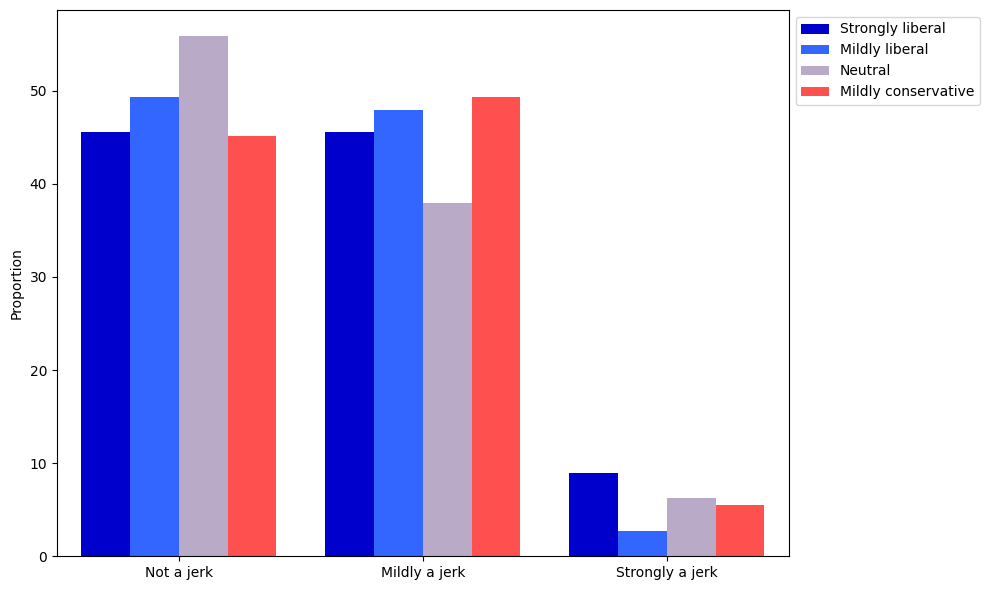

In [1469]:
demo = "self"

for value in ["doctor"]:
    graph_proportion_stack(df_clean, value, demo, jerk_order, self_order, self_colors, label="Political Leaning in Upbringing")
    graph_proportion_side_by_side(df_clean, value, demo, self_order, jerk_order, self_colors, label="Political Leaning in Upbringing")

Political Leaning in Upbringing Distribution for flight Jerk Rating


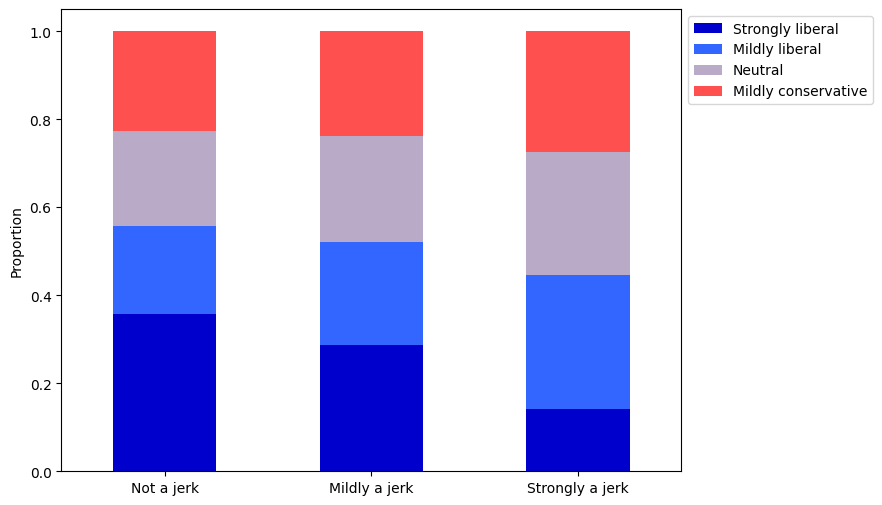

Proportion of Responses by flight


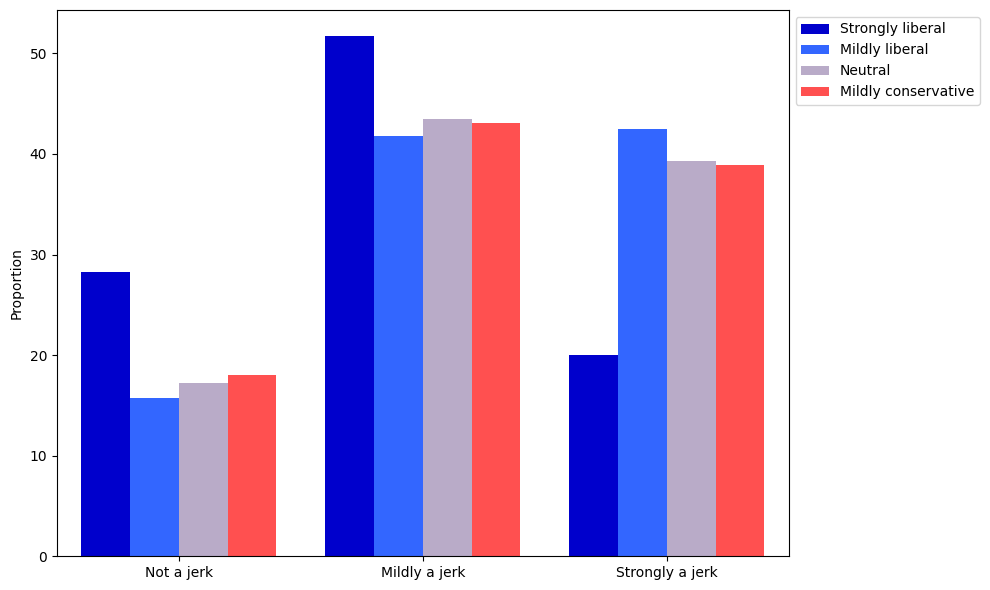

Political Leaning in Upbringing Distribution for child support Jerk Rating


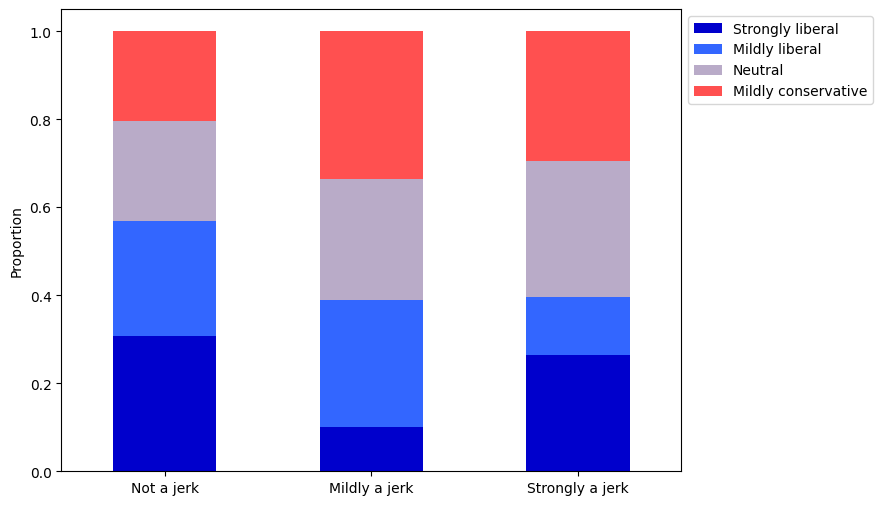

Proportion of Responses by child support


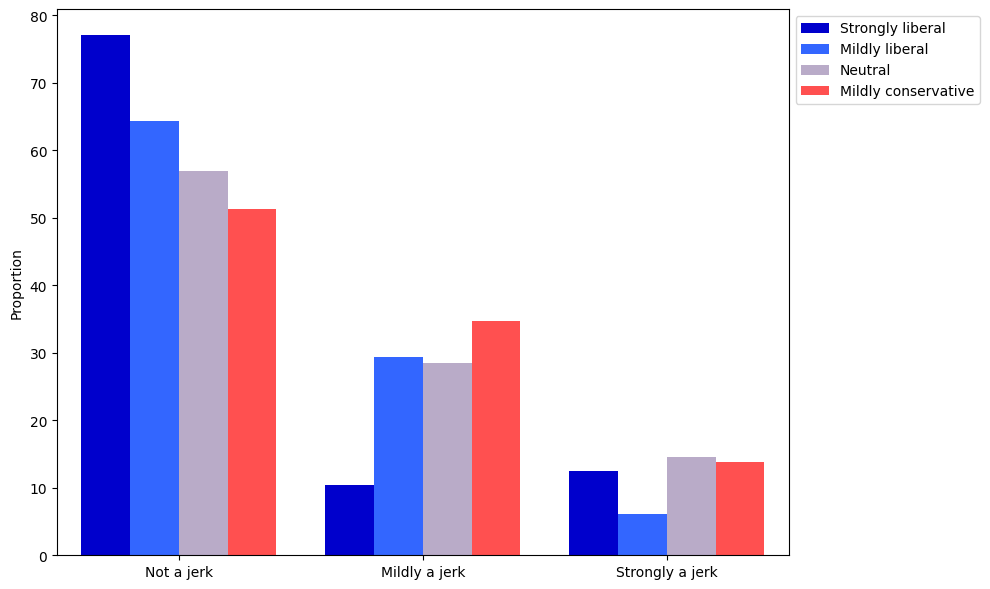

Political Leaning in Upbringing Distribution for lgbtq Jerk Rating


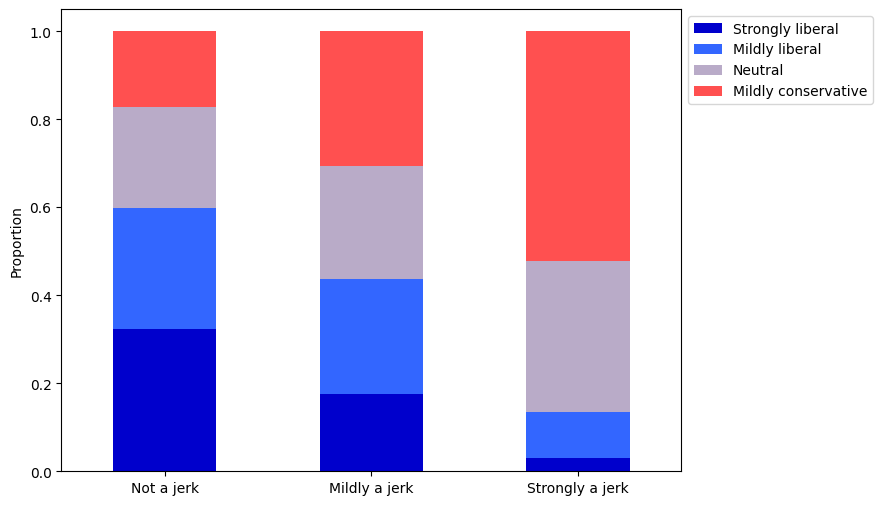

Proportion of Responses by lgbtq


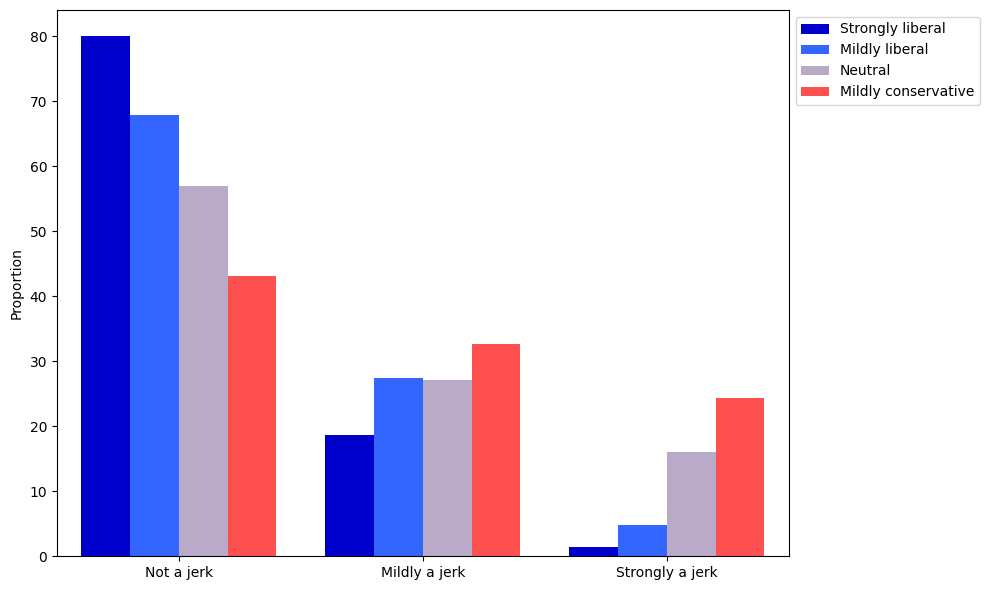

In [1468]:
demo = "self"

for value in ["flight", "child support", "lgbtq"]:
    graph_proportion_stack(df_clean, value, demo, jerk_order, self_order, self_colors, label="Political Leaning in Upbringing")
    graph_proportion_side_by_side(df_clean, value, demo, self_order, jerk_order, self_colors, label="Political Leaning in Upbringing")

In [1457]:
rel_order = [
    "Not religious at all",
    "Somewhat religious",
    "Strongly religious"
]

rel_colors = {
    "Not religious at all": "#c0c0c0",  # Gray
    "Somewhat religious": "#ffcc00",    # Yellow
    "Strongly religious": "#ff6600",    # Orange
}



Political Leaning in Upbringing Distribution for flight Jerk Rating


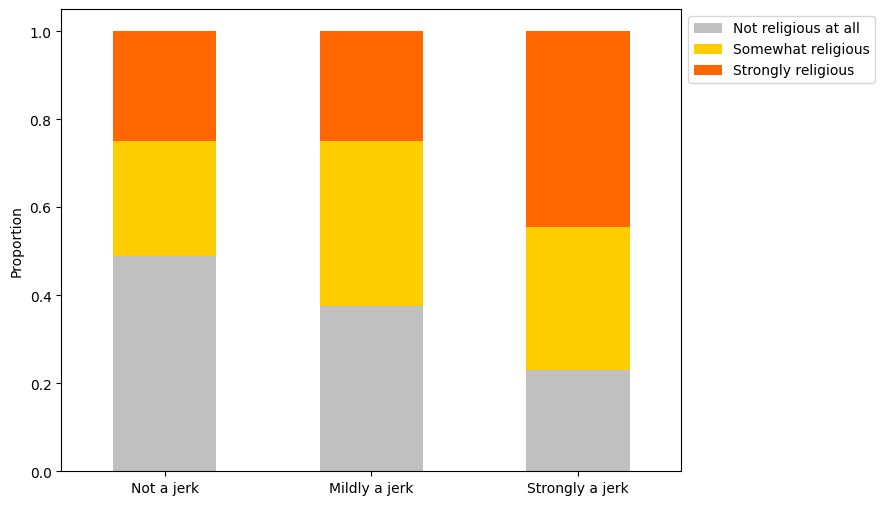

Proportion of Responses by flight


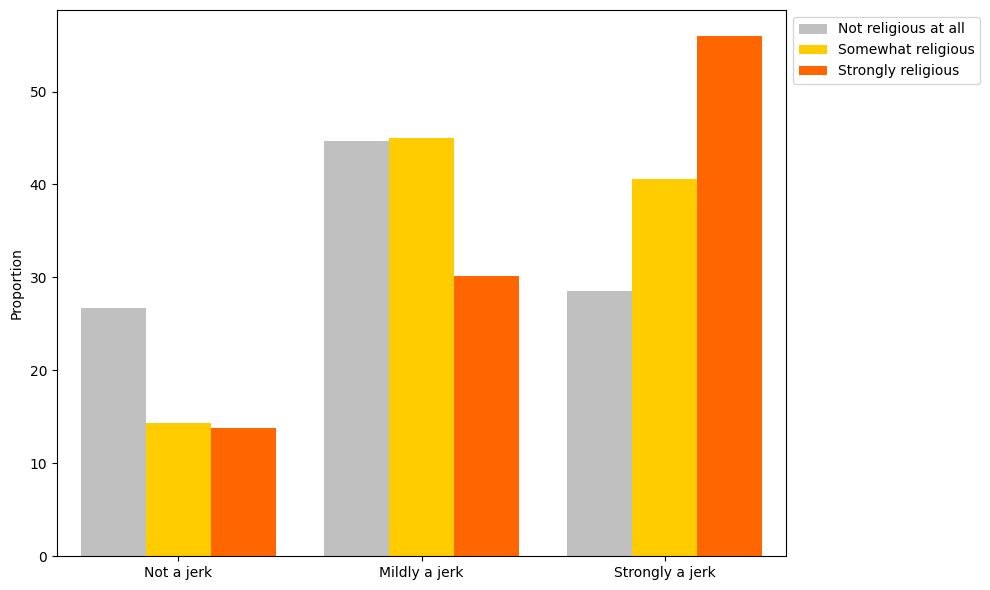

Political Leaning in Upbringing Distribution for lgbtq Jerk Rating


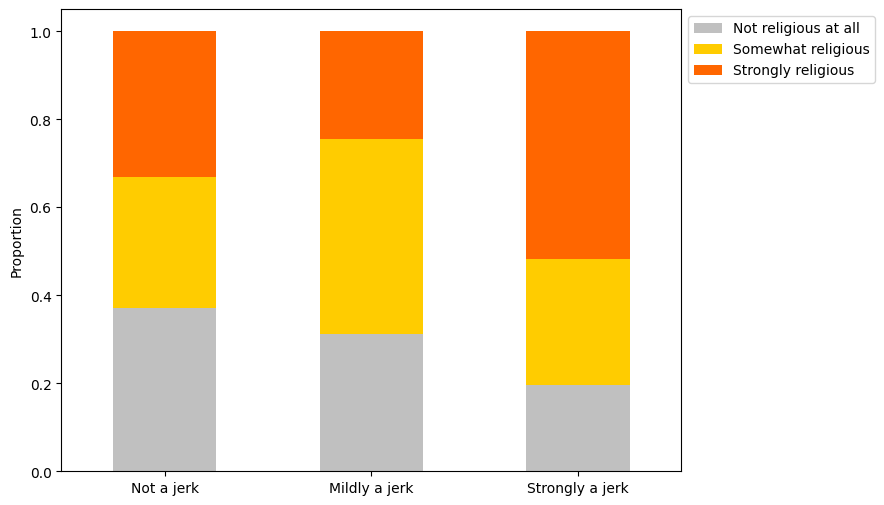

Proportion of Responses by lgbtq


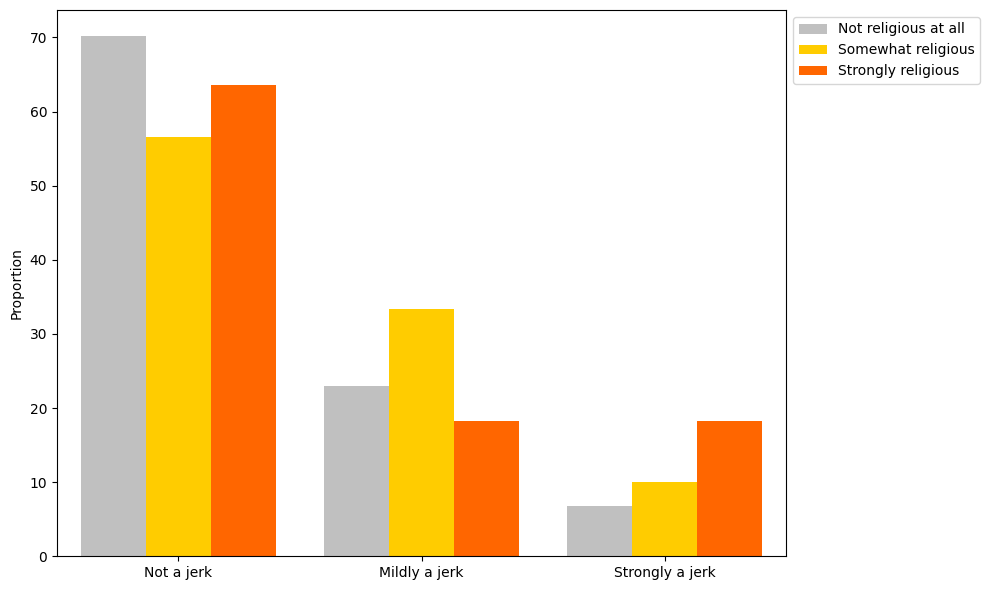

In [1458]:
demo = "religion"

for value in ["flight", "lgbtq"]:
    graph_proportion_stack(df_clean, value, demo, jerk_order, rel_order, rel_colors, label="Political Leaning in Upbringing")
    graph_proportion_side_by_side(df_clean, value, demo, rel_order, jerk_order, rel_colors, label="Political Leaning in Upbringing")

In [1459]:

gen_order = [
    "Male",
    "Female"
]

gen_colors = {
"Male": "#0099cc",  # Deep Blue
"Female": "#FFa0aB",    # Medium Blue
}

Political Leaning in Upbringing Distribution for trust fund Jerk Rating


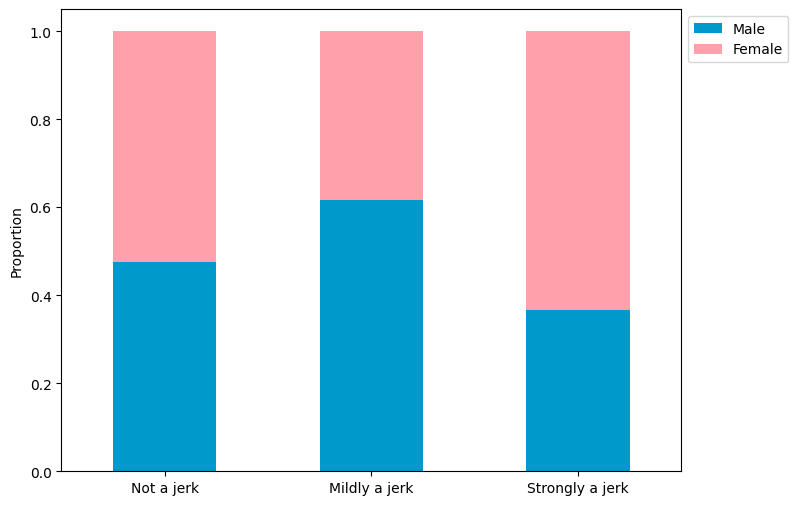

Proportion of Responses by trust fund


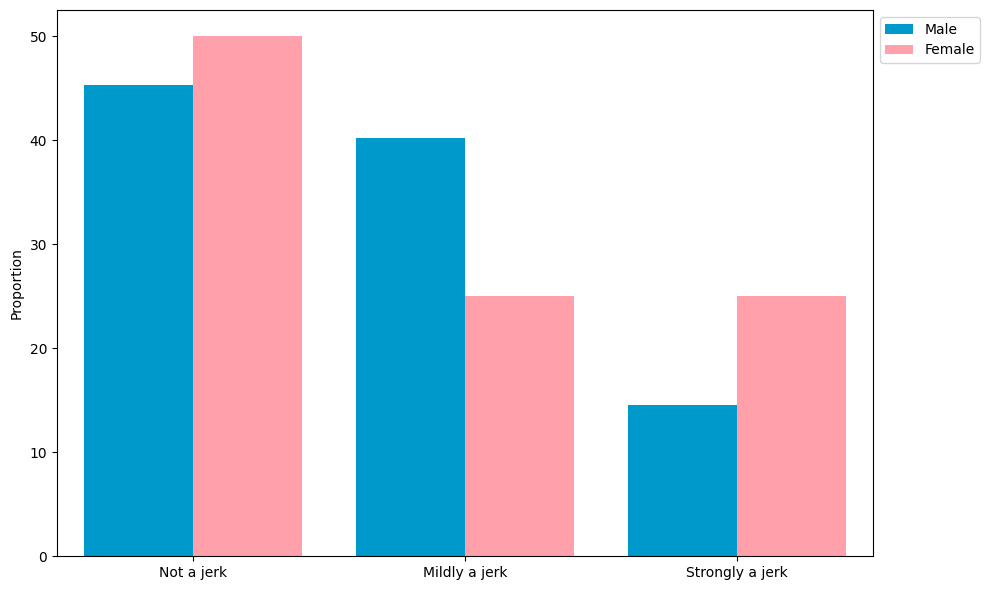

In [1460]:
demo = "gender"

for value in ["trust fund"]:
    graph_proportion_stack(df_clean, value, demo, jerk_order, gen_order, gen_colors, label="Political Leaning in Upbringing")
    graph_proportion_side_by_side(df_clean, value, demo, gen_order, jerk_order, gen_colors, label="Political Leaning in Upbringing")

In [1461]:
df1["q gender"] = ["Male" for i in range(len(df1))]
df2["q gender"] = ["Female" for i in range(len(df2))]
df3_2["q gender"] = ["Female" for i in range(len(df3_2))]
df4["q gender"] = ["Male" for i in range(len(df4))]

In [1462]:
df_gendered = pd.concat([df1, df2, df3_2, df4])

In [1463]:
df_gendered = clean_data(df_gendered)

C:\Users\jonat\AppData\Local\Temp\ipykernel_13500\1882846224.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [1464]:
alpha = 0.05

In [1465]:

sig_vals_gendered = []
p_vals = []
significant_tests = []
for aita in aita_questions:

    data = pd.crosstab(df_gendered["q gender"], df_gendered[aita])
    stat, p, dof, expected = chi2_contingency(data)
    p_vals.append(p)

    significant_tests.append(p < alpha)

    if p < alpha:
        sig_vals_gendered.append(("q gender", aita))
        

for i, (p, sig) in enumerate(zip(p_vals, significant_tests)):
    print(f"\tTest {i+1}, {aita_questions[i]}: \n\t\tOriginal p={p:.5f}, Significant={sig}")


	Test 1, doctor: 
		Original p=0.00038, Significant=True
	Test 2, reading: 
		Original p=0.85237, Significant=False
	Test 3, trust fund: 
		Original p=0.20522, Significant=False
	Test 4, private school: 
		Original p=0.00001, Significant=True
	Test 5, cat: 
		Original p=0.06698, Significant=False
	Test 6, burned food: 
		Original p=0.65420, Significant=False
	Test 7, flight: 
		Original p=0.30671, Significant=False
	Test 8, child support: 
		Original p=0.72743, Significant=False
	Test 9, investigation: 
		Original p=0.85539, Significant=False
	Test 10, expensive school: 
		Original p=0.33265, Significant=False
	Test 11, in law: 
		Original p=0.00000, Significant=True
	Test 12, lgbtq: 
		Original p=0.83349, Significant=False
	Test 13, drinking: 
		Original p=0.19882, Significant=False
	Test 14, hair dye: 
		Original p=0.09461, Significant=False


In [1466]:
sig_vals_gendered

[('q gender', 'doctor'),
 ('q gender', 'private school'),
 ('q gender', 'in law')]

Political Leaning in Upbringing Distribution for doctor Jerk Rating


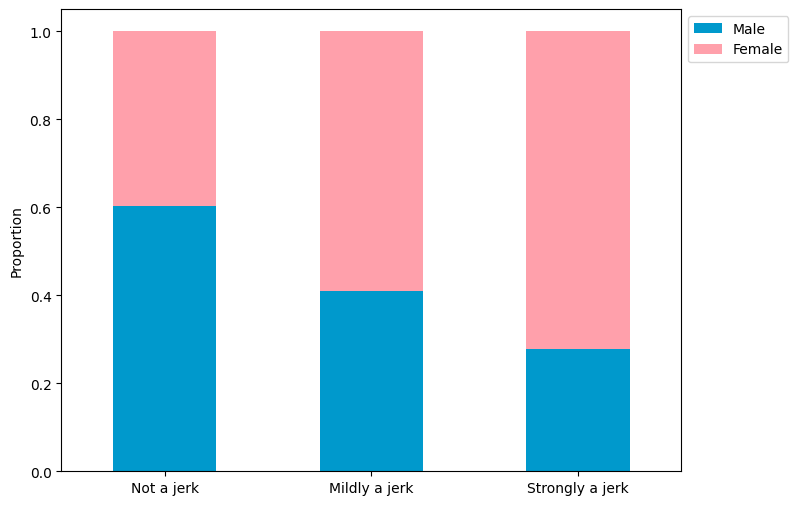

Proportion of Responses by doctor


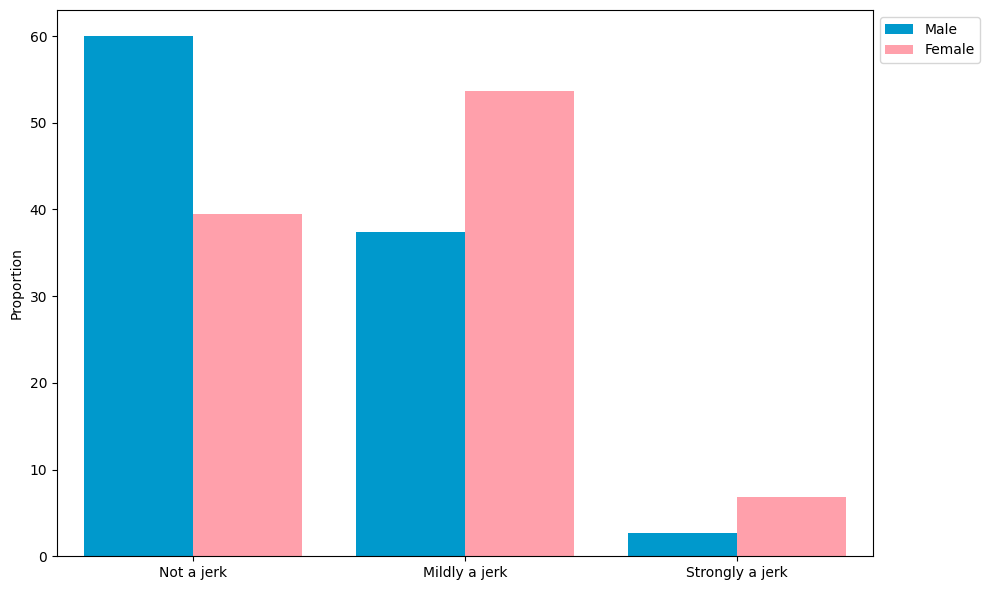

Political Leaning in Upbringing Distribution for private school Jerk Rating


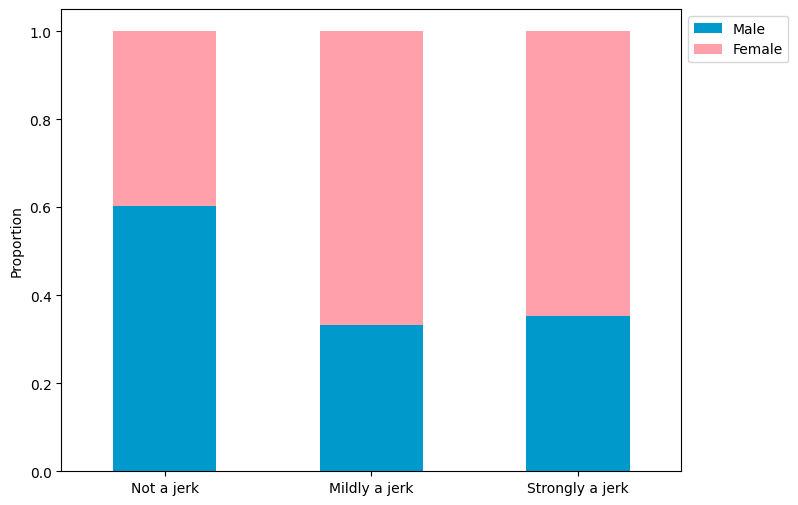

Proportion of Responses by private school


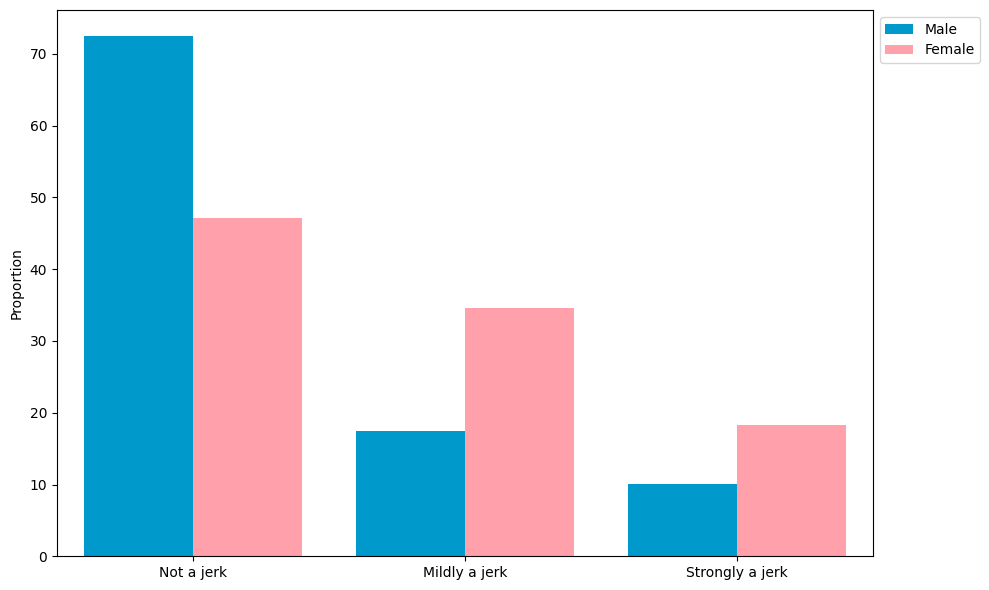

In [1467]:
demo = "q gender"

for value in ["doctor", "private school"]:
    graph_proportion_stack(df_gendered, value, demo, jerk_order, gen_order, gen_colors, label="Political Leaning in Upbringing")
    graph_proportion_side_by_side(df_gendered, value, demo, gen_order, jerk_order, gen_colors, label="Political Leaning in Upbringing")